In [47]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('group_gcc_lang.csv')
language = df.rename(columns={"rows/key/0": "Greater Capital City", "rows/key/1": "language", "rows/value": "Count"})
language


,Greater Capital City,language,Count
0,Australian Capital Territory (Canberra),ar,143
1,Australian Capital Territory (Canberra),art,76
2,Australian Capital Territory (Canberra),bg,3
3,Australian Capital Territory (Canberra),bn,2
4,Australian Capital Territory (Canberra),ca,123
...,...,...,...
436,Greater Sydney,vi,101
437,Greater Sydney,zh,11538
438,Greater Sydney,zxx,3564
439,Other Territory,en,40


### Language diversity in each gcc

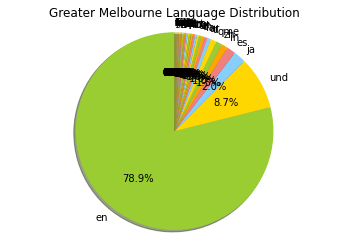

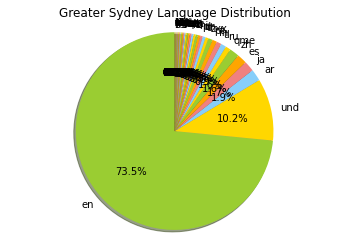

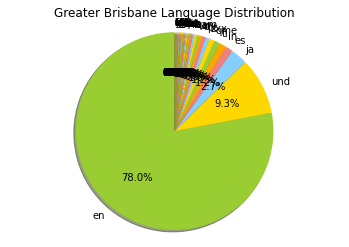

In [26]:
# 对数据进行分组和汇总，提取前三个语言数量最多的Greater Capital City
top_cities = language.groupby('Greater Capital City').sum().sort_values(by='Count', ascending=False).head(3)

# 计算每个城市中各语言的占比
top_cities['Percent'] = top_cities['Count'] / top_cities['Count'].sum() * 100

# 画出饼图
for city in top_cities.index:
    languages = language.loc[language['Greater Capital City'] == city, ['language', 'Count']].groupby('language').sum().sort_values(by='Count', ascending=False)
    labels = languages[]

    sizes = languages['Count']
    colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'orange']
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
    plt.axis('equal')
    plt.title(city + ' Language Distribution')
    plt.show()


/var/folders/vb/kjwyk4kn79s81t6y46g8crxw0000gn/T/ipykernel_66842/2820725409.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_curse = top_curse.append(temp)
/var/folders/vb/kjwyk4kn79s81t6y46g8crxw0000gn/T/ipykernel_66842/2820725409.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_curse = top_curse.append(temp)
/var/folders/vb/kjwyk4kn79s81t6y46g8crxw0000gn/T/ipykernel_66842/2820725409.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_curse = top_curse.append(temp)
/var/folders/vb/kjwyk4kn79s81t6y46g8crxw0000gn/T/ipykernel_66842/2820725409.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

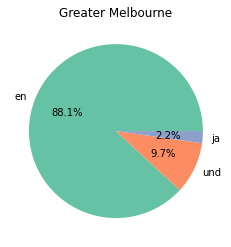

/var/folders/vb/kjwyk4kn79s81t6y46g8crxw0000gn/T/ipykernel_66842/2820725409.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gcc_data['Percentage'] = gcc_data['Count'] / total_count


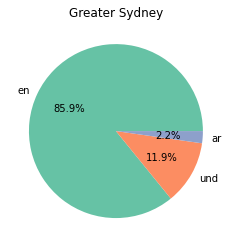

/var/folders/vb/kjwyk4kn79s81t6y46g8crxw0000gn/T/ipykernel_66842/2820725409.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gcc_data['Percentage'] = gcc_data['Count'] / total_count


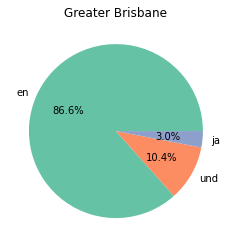

In [17]:
# 筛选出脏话语言最多的前三个GCC
top_gcc = language.groupby('Greater Capital City')['Count'].sum().nlargest(3).index.tolist()

# 计算每个GCC的每种脏话语言数量，并筛选出前三个数量最多的脏话语言
top_curse = pd.DataFrame()
for gcc in top_gcc:
    temp = language[language['Greater Capital City'] == gcc].groupby('language')['Count'].sum().nlargest(3).reset_index()
    temp['Greater Capital City'] = gcc
    top_curse = top_curse.append(temp)

# 根据不同语言的占比画出饼图
for gcc in top_gcc:
    # 筛选出当前GCC的数据
    gcc_data = top_curse[top_curse['Greater Capital City'] == gcc]
    
    # 计算各个脏话语言的占比
    total_count = gcc_data['Count'].sum()
    gcc_data['Percentage'] = gcc_data['Count'] / total_count
    
    # 绘制饼图
    fig, ax = plt.subplots()
    ax.pie(gcc_data['Percentage'], labels=gcc_data['language'], autopct='%1.1f%%')
    ax.set_title(gcc)
    plt.show()

### Curse words in each gcc

In [14]:
df1 = pd.read_csv('What kinds of curse words does each gcc have.csv')
curse_words= df1.rename(columns={"rows/key/0": "Greater Capital City", "rows/key/1": "Curse words", "rows/value": "Count"})
curse_words

,Greater Capital City,Curse words,Count
0,Australian Capital Territory (Canberra),anal,2
1,Australian Capital Territory (Canberra),arsehole,5
2,Australian Capital Territory (Canberra),ass,43
3,Australian Capital Territory (Canberra),asshole,4
4,Australian Capital Territory (Canberra),bastard,13
...,...,...,...
962,Greater Sydney,voyeur,2
963,Greater Sydney,vulva,9
964,Greater Sydney,wank,33
965,Greater Sydney,whore,56


### Crime graph

In [48]:
drug_offence = pd.read_csv('illicit drug offences.csv')
offence = pd.read_csv('miscellaneous offences.csv')

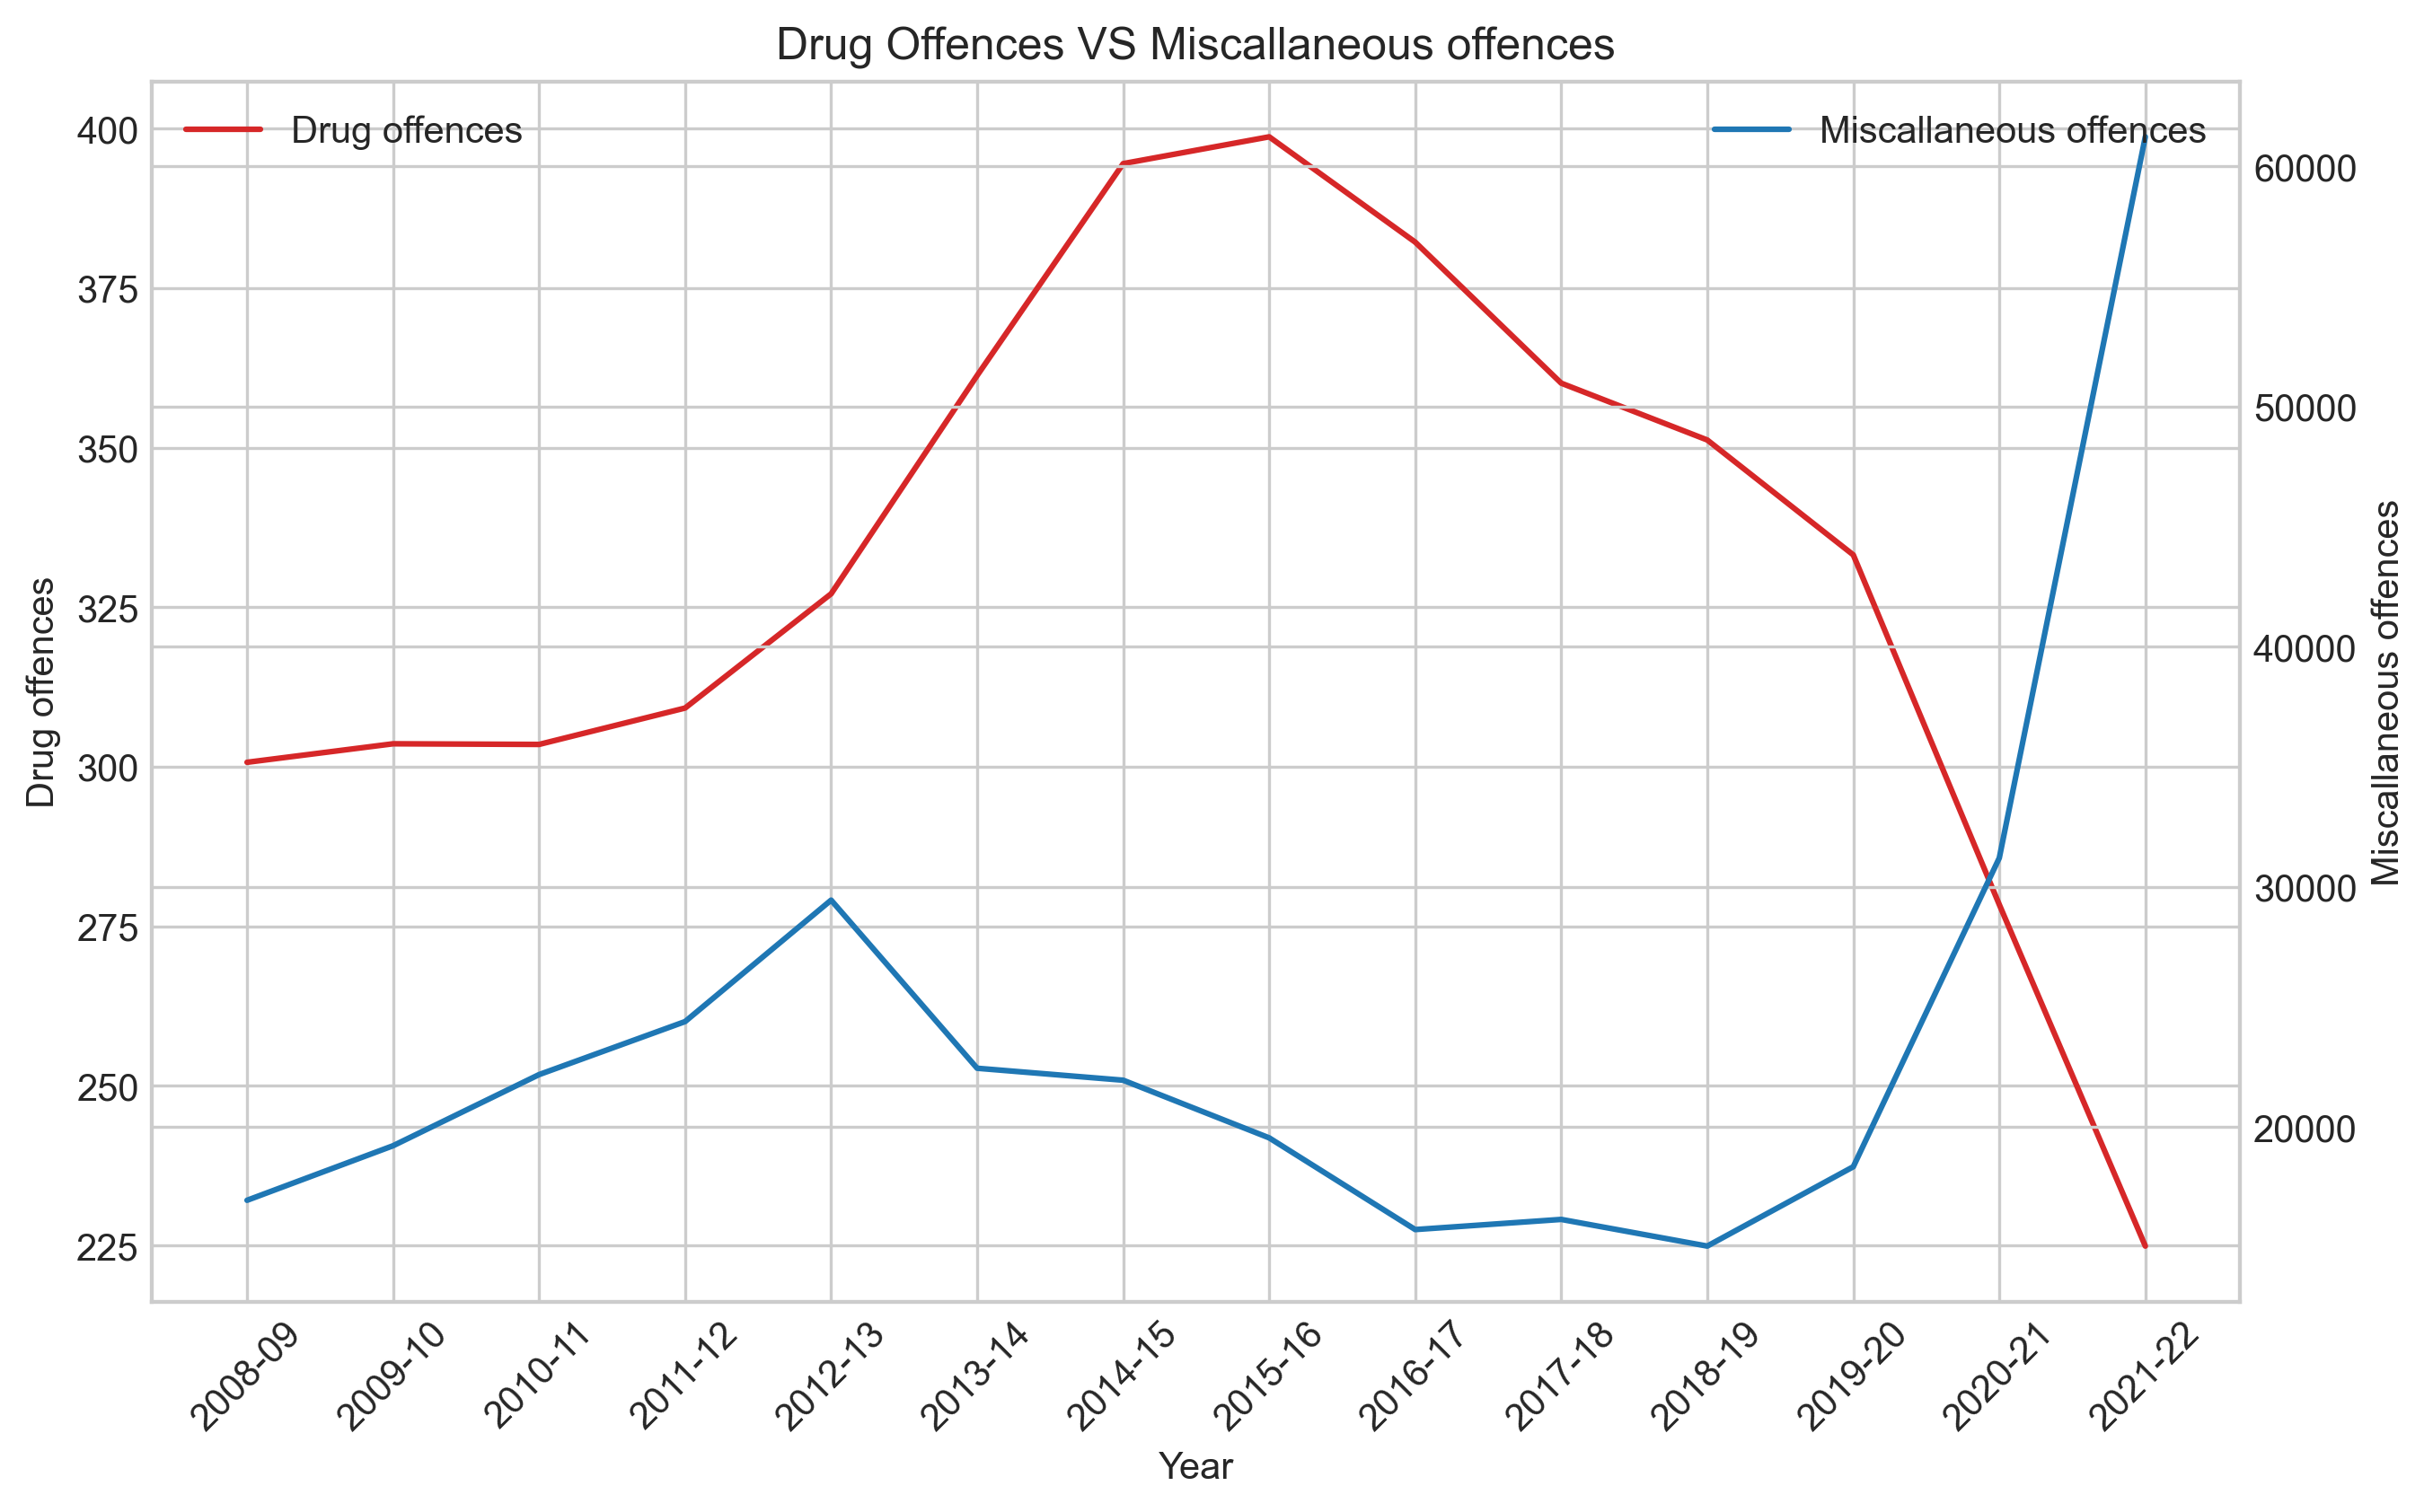

In [84]:
import matplotlib.pyplot as plt
import pandas as pd

# 创建数据框
data = {
    'Year': ['2008-09', '2009-10', '2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17',
             '2017-18', '2018-19', '2019-20', '2020-21', '2021-22'],
    'drug offences': [300.7, 303.6, 303.5, 309.2, 327.1, 361.3, 394.5, 398.7, 382.2, 360.1, 351.2, 333.2, 278.4, 224.9],
    'total': ['16,957', '19,228', '22,190', '24,397', '29,453', '22,454', '21,956', '19,556', '15,739', '16,161', 
              '15,051', '18,353', '31,209', '61,229']
}

df = pd.DataFrame(data)

# 将total列转换为数字类型
df['total'] = df['total'].str.replace(',', '').astype(int)

fig, ax1 = plt.subplots(figsize=(10, 6), dpi=300)
plt.xticks(rotation=45)

# 绘制第一条线
ax1.set_xlabel('Year')
ax1.set_ylabel('Drug offences')
ax1.plot(df['Year'], df['drug offences'], color='tab:red')

# 创建第二个纵轴
ax2 = ax1.twinx()

# 绘制第二条线
ax2.set_ylabel('Miscallaneous offences')
ax2.plot(df['Year'], df['total'], color='tab:blue')

# 添加图例
ax1.legend(labels=['Drug offences'], loc='upper left')
ax2.legend(labels=['Miscallaneous offences'], loc='upper right')

# 添加标题
plt.title('Drug Offences VS Miscallaneous offences')

plt.show()


In [2]:
percent_crime = pd.read_csv('percentTweetCrime.csv')
crime_count = pd.read_csv('tweetContainCrimeCountGcc.csv')


In [3]:
percent_crime

,Australian Capital Territory (Canberra),Greater Adelaide,Greater Brisbane,Greater Darwin,Greater Hobart,Greater Melbourne,Greater Perth,Greater Sydney
0,0.591616,0.473119,0.778273,0.423488,0.502525,0.597993,0.621326,0.558405


In [4]:
crime_count

,Greater Capital City,Total
0,Australian Capital Territory (Canberra),452
1,Greater Adelaide,817
2,Greater Brisbane,2677
3,Greater Darwin,92
4,Greater Hobart,216
5,Greater Melbourne,4851
6,Greater Perth,1460
7,Greater Sydney,4622


In [5]:
percent=percent_crime.melt(var_name="Greater Capital City",value_name="Percent") 
percent=percent.sort_values(by=["Greater Capital City","Percent"],ascending=False) 
percent

,Greater Capital City,Percent
7,Greater Sydney,0.558405
6,Greater Perth,0.621326
5,Greater Melbourne,0.597993
4,Greater Hobart,0.502525
3,Greater Darwin,0.423488
2,Greater Brisbane,0.778273
1,Greater Adelaide,0.473119
0,Australian Capital Territory (Canberra),0.591616


In [49]:
crime_statistics = pd.merge(percent, crime_count, on='Greater Capital City')
crime_statistics = crime_statistics[['Greater Capital City', 'Percent','Total']].sort_values(by='Percent', ascending=False)
crime_statistics

,Greater Capital City,Percent,Total
5,Greater Brisbane,0.778273,2677
1,Greater Perth,0.621326,1460
2,Greater Melbourne,0.597993,4851
7,Australian Capital Territory (Canberra),0.591616,452
0,Greater Sydney,0.558405,4622
3,Greater Hobart,0.502525,216
6,Greater Adelaide,0.473119,817
4,Greater Darwin,0.423488,92


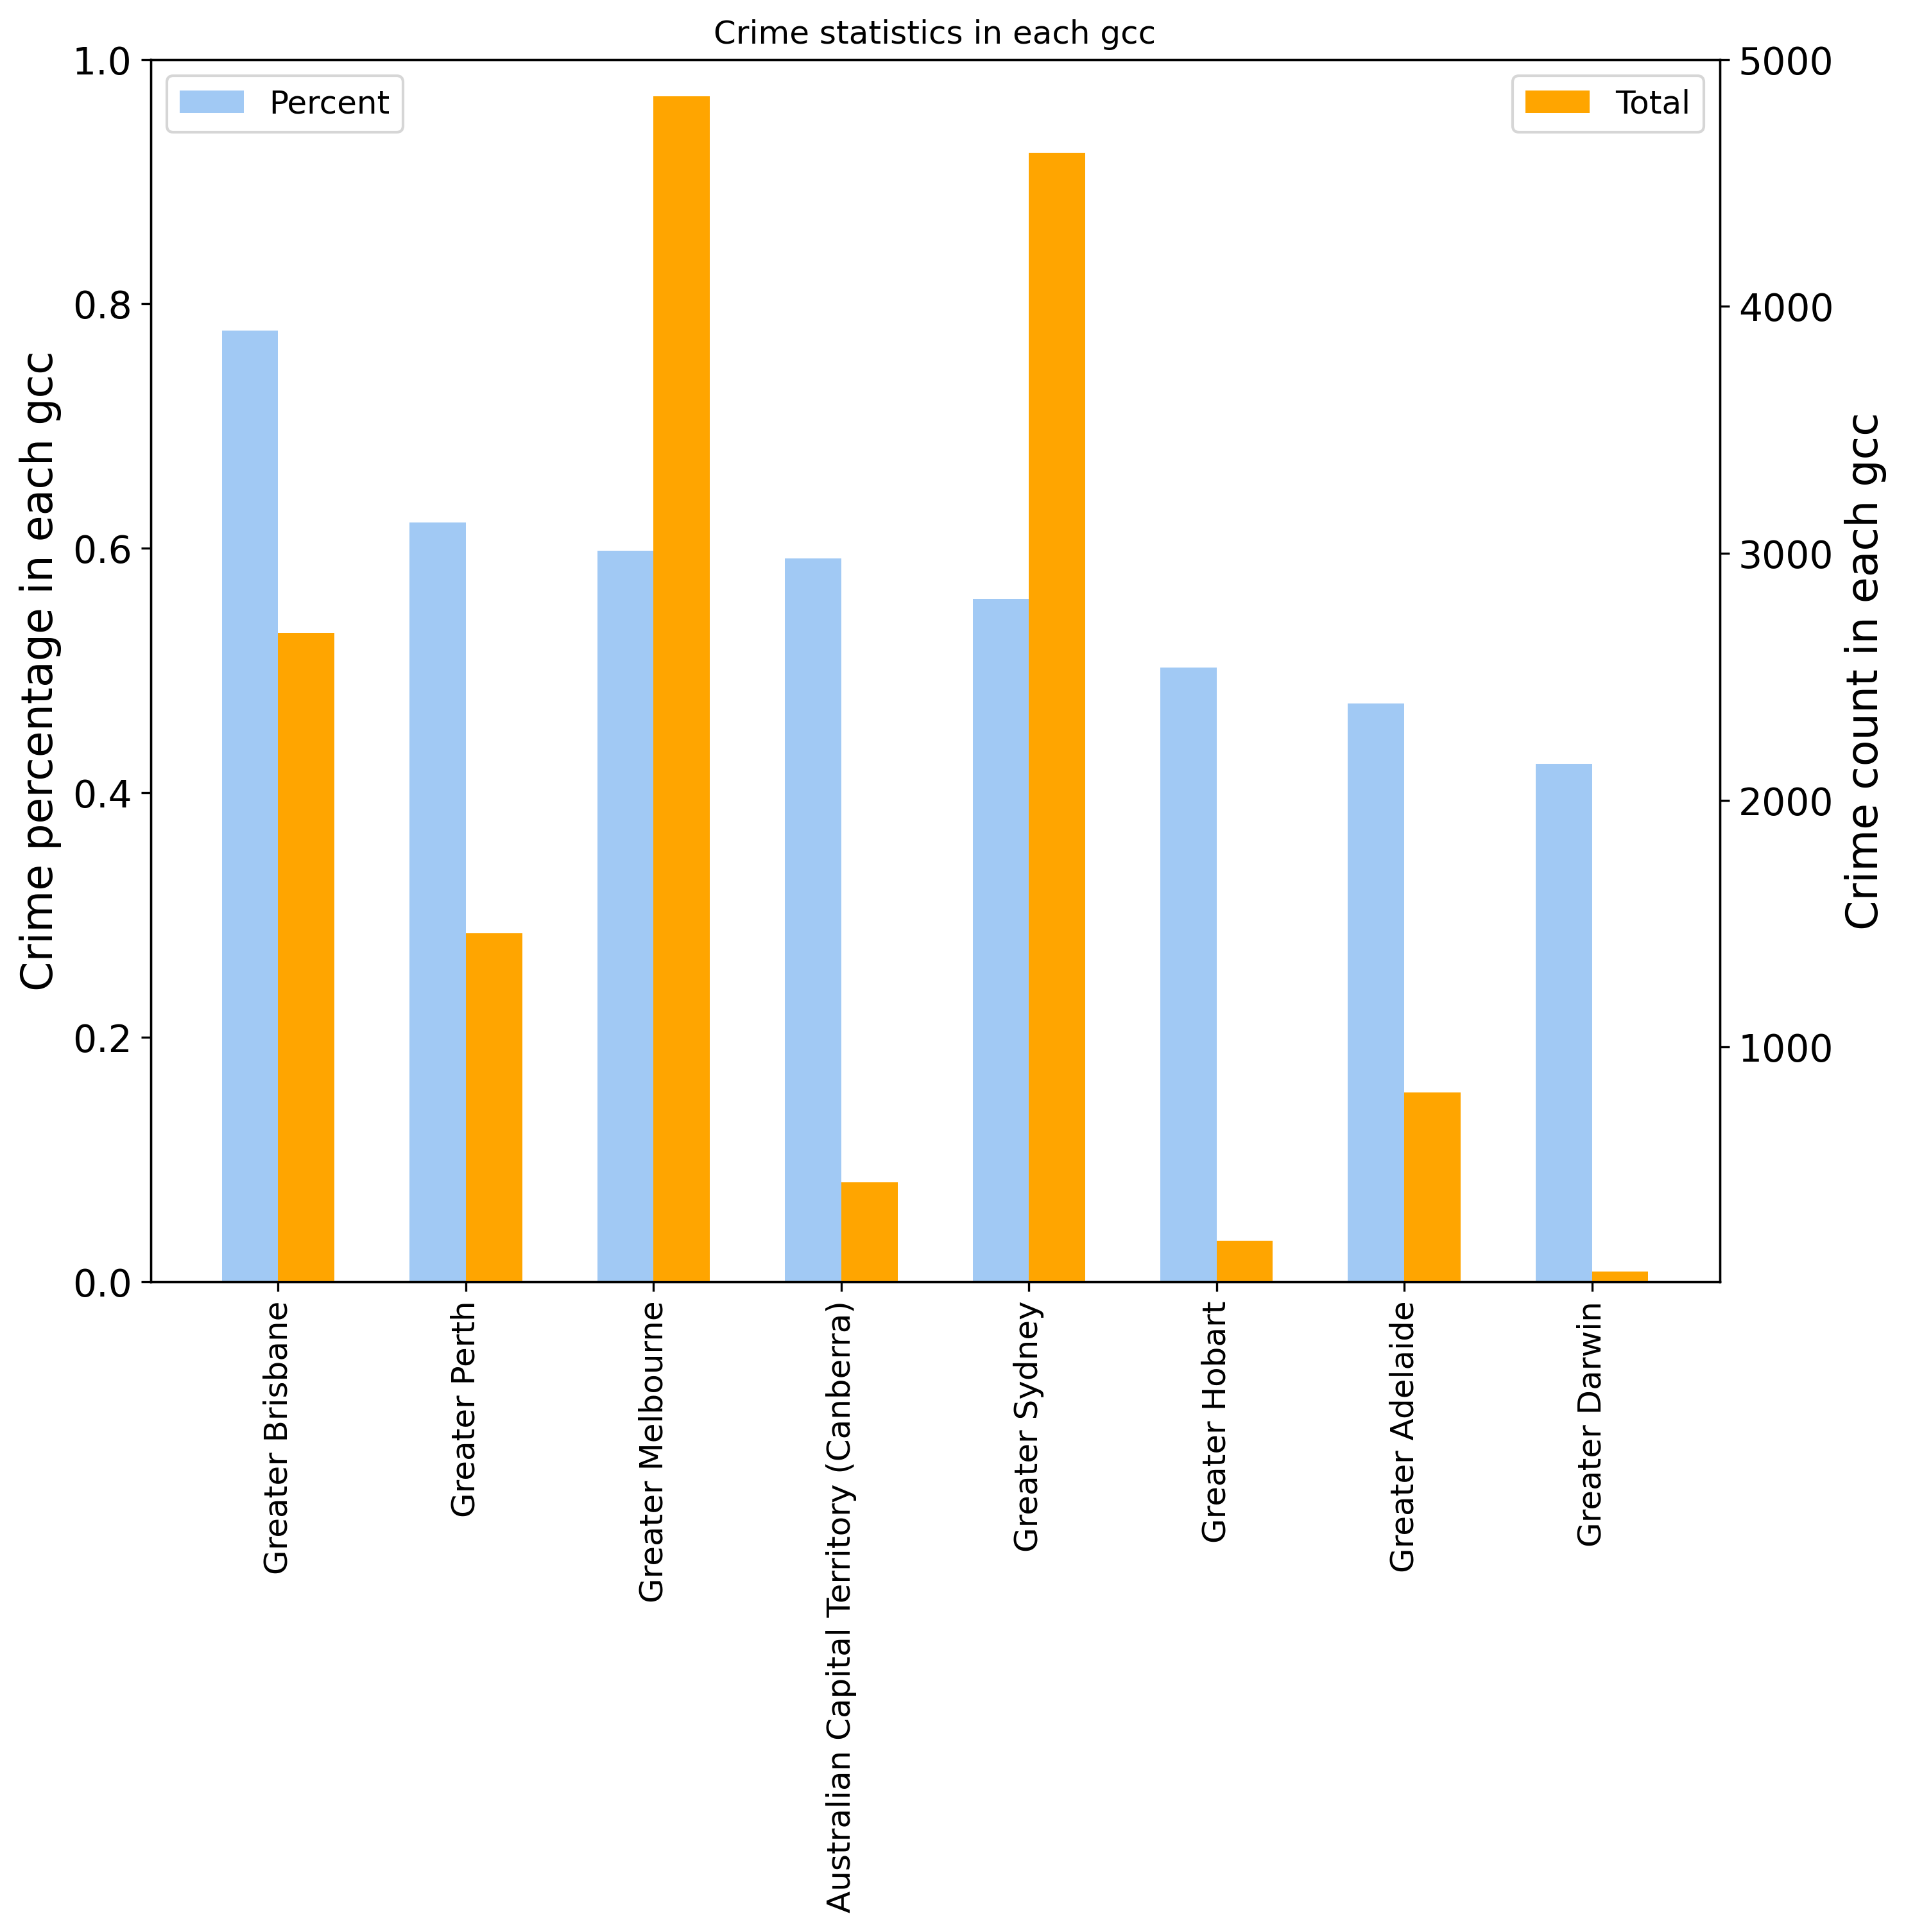

In [53]:
import seaborn as sns

# 定义颜色调色板
colors = sns.color_palette('pastel')

width = 0.3  # 柱形的宽度
x1_list = []
x2_list = []
for i in range(len(crime_statistics['Greater Capital City'])):
    x1_list.append(i)
    x2_list.append(i + width)
fig, ax1 = plt.subplots(figsize=(10, 10), dpi=300)
plt.xticks(rotation=90)

# 设置左侧Y轴对应的figure
ax1.set_ylabel('Crime percentage in each gcc')
ax1.set_ylim(0, 1)
ax1.bar(x1_list,crime_statistics['Percent'],width=width, color=colors[0], align='edge')

# 设置右侧Y轴对应的figure
ax2 = ax1.twinx()
ax2.set_ylabel('Crime count in each gcc')
ax2.set_ylim(50, 5000)
ax2.bar(x2_list,crime_statistics['Total'], width=width, color='orange', align='edge', tick_label=crime_statistics['Greater Capital City'])

ax2.legend(labels=['Total'], loc='upper right')
ax1.legend(labels=['Percent'], loc='upper left')

plt.tight_layout()
plt.title('Crime statistics in each gcc')

plt.show()
